# Интерполяция алгебраическими многочленами

### Герасимчик Анна. 2 курс 1 группа

## 1. Постановка задачи:
На отрезке [a, b] заданы функции f1x() и f2x(). Построить многочлены степени n = 3, 5, 7, 10, 15, интерполирующие каждую из них по узлам:

    - равномерно расположенным на указанном отрезке;
    - расположенным на указанном отрезке оптимальным (минимизирующим погрешность) образом.
В отчет включить представление, использованное при построении многочленов, способ выбора узлов, графики функций f1x(), f2x(), графики полученных интерполяционных многочленов, а также графики абсолютных погрешностей приближения функций многочленами. Сделать выводы о сходимости интерполяционного процесса по равноотстоящим и чебышѐвским узлам.

По результатам лабораторной работы оформляется отчет. Он должен содержать:

    - титульный лист;  
    - постановку задачи;  
    - краткие теоретические сведения;  
    - листинг программы с комментариями;  
    - результаты;  
    - выводы.

## 2. Краткие теоретические сведения
Интерполяцио́нный многочле́н Лагра́нжа — многочлен минимальной степени, принимающий данные значения в данном наборе точек. Для _n + 1_ пар чисел *(x0, y0), (x1, y1),…, (xn, yn)*, где все _xj_ различны, существует единственный многочлен _L(x)_ степени не более _n_, для которого _L(xj) = yj_.

В простейшем случае _(n = 1)_ — это линейный многочлен, график которого — прямая, проходящая через две заданные точки.

Лагранж предложил способ вычисления таких многочленов:
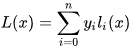
где базисные полиномы определяются по формуле:
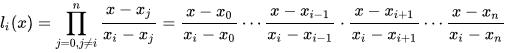

_li(x)_ обладают следующими свойствами:
- являются многочленами степени n
- _li(xi) = 1_
- _li(xj) = 0_ при _j ≠ i_

Отсюда следует, что *L(x)*, как линейная комбинация *li(x)*, может иметь степень не больше _n_, и *L(xi) = yi*.

Для натурального числа n узлы Чебышёва на отрезке [−1, 1] задаются формулой 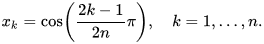
Это корни многочлена Чебышёва первого рода степени _n_. Для получения узлов на произвольном отрезке [a, b] можно применить аффинное преобразование отрезков: 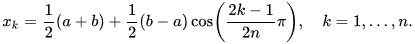

## 3. Листинг программы

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# объявление функций

def f1x(x):
    return math.exp(math.cos(x))

def f2x(x):
    return math.fabs(x * math.fabs(x) - 1)

In [2]:
# построение точек для отображения графика по функции

def functionXY(fx, a1, b1, h):
    k = round((b1 - a1) / h) + 1
    x = np.zeros(k)
    y = np.zeros(k)
    for i in range(k):
        y[i] = fx(a1)
        x[i] = a1
        a1 = a1 + h
    return x, y

In [3]:
# разделение отрезка на равноотстоящие точки

def divideSegment(a, b, n):
    h = (b - a) / n
    v = a
    x = np.zeros(n + 1)
    for i in range(n + 1):
        x[i] = v
        v = v + h
    return x

In [4]:
# разделение отрезка на точки по Чебышеву

def divideSegmentByChebushev(a, b, n):
    n += 1
    x = np.zeros(n)
    g1 = (a + b) / 2
    g2 = (b - a) / 2
    for i in range(n):
        x[i] = g1 + g2 * math.cos((2 * (i + 1) - 1) / (2 * n) * math.pi)
    return x

In [5]:
# интерполяционный многочлен Лагранжа

def lagrangePolynomial(v, x, fx):
    n = x.size  
    res = 0
    for i in range(n):
        p = fx(x[i])
        for j in range(n):
            if (j != i):
                p = p * (v - x[j]) / (x[i] - x[j])
        res += p
    return res

In [6]:
# построение точек для отображения графика по интерполяционному многочлену Лагранжа

def lagrangeMethod(fx, divideMethod, a, b, n, a1, b1, h):
    x = divideMethod(a, b, n)
    k = round((b1 - a1) / h) + 1;
    y = np.zeros(k);
    z = np.zeros(k);
    for i in range(k):
        y[i] = lagrangePolynomial(a1, x, fx)
        z[i] = a1
        a1 = a1 + h
    return z, y

In [7]:
# вычисление погрешности потстроенного многочлена от функции в точках

def error(fx, x, y):
    err = np.zeros(len(x))
    for i in range(x.size):
        errtemp = math.fabs(fx(x[i]) - y[i])
        err[i] = errtemp
    return err

In [8]:
# решение

a = -2
b = 2
a1 = -2
b1 = 2
h = 0.1
n = np.array((3, 5, 7, 10, 15))
    
def solution(fx, label):    
    x_f, y_f = functionXY(fx, a1, b1, h)
    for i in range(n.size):
        x, y = lagrangeMethod(fx, divideSegment, a, b, n[i], a1, b1, h)
        x2, y2 = lagrangeMethod(fx, divideSegmentByChebushev, a, b, n[i], a1, b1, h)
        y_error = error(fx, x, y)
        y2_error = error(fx, x2, y2)

        plt.plot(x, y, color = "deepskyblue", label = u"n = " + n[i].astype(str))
        plt.plot(x2, y2, color = "green", label = u"n = " + n[i].astype(str) + " by Chebushev")
        plt.plot(x_f, y_f, color = "red", label = label)
        plt.plot(x, y_error, color = "lightskyblue", label = u"error")
        plt.plot(x2, y2_error, color = "darkseagreen", label = u"error by Chebushev")
        plt.legend()
        plt.grid(True)
        plt.xlabel(u'Аргумент')
        plt.ylabel(u'Функция')
        plt.show()

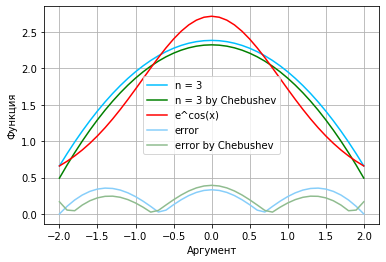

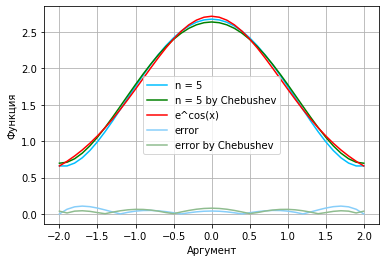

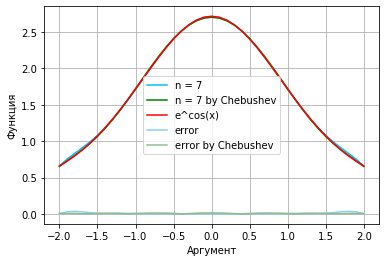

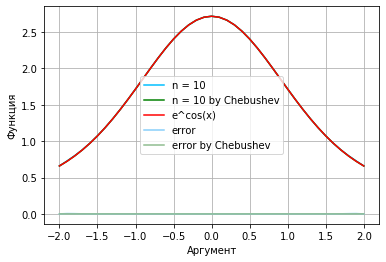

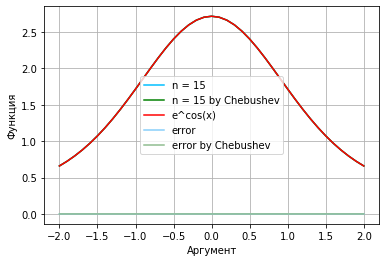

In [9]:
# графики f1x()

solution(f1x, "e^cos(x)")

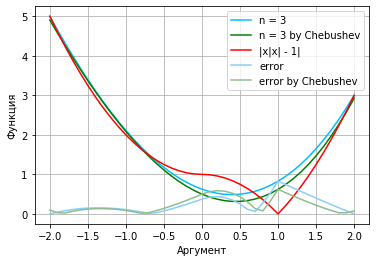

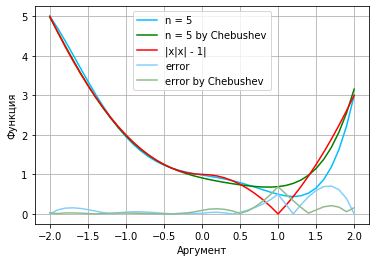

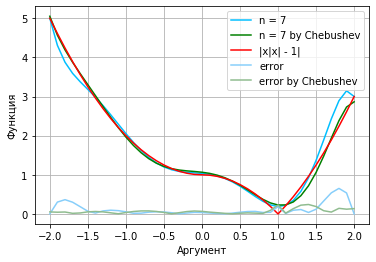

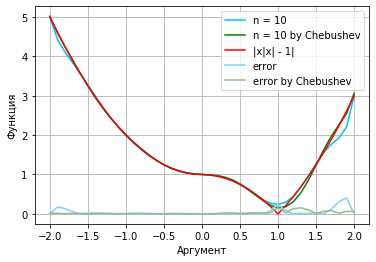

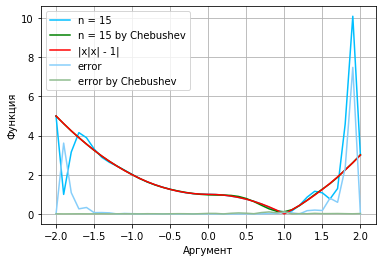

In [10]:
# графики f2x()

solution(f2x, "|x|x| - 1|")

## 5. Вывод
Таким образом, из построенных графиков видно, что не всегда интерполяционный многочлен Лагранжа со степенью выше оказывается точнее, чем многочлен степенью ниже. Интерполяционного процесс по чебышевским узлам дает лучшее приближение к исходной функции с меньшей погрешностью из-за оптимального выбора узлов, чем интерполяционный процесс по равноотстоящим узлам.